## Introduction to System Design

### Introduction to High Level Design

#### What should be included in a High Level System Design (HLD)?
* Overall architecture
  + How the system can be built to fulfill requirements
    + functional
    + nonfuncional
      + scalability, latency, and other performance requirements
* Components and services
  + Any system is a collection of various services and other components interacting with each other. 
  + decide how the system will be broken down, what will the microservices be, and their scope.
* Interraction between the systems
  + How will the systems interact with each other? 
    + What protocols will you use? 
    + Will it be synchronous or asynchronous? 
* Databases
  + What databases will you need?
  + What kind of data do you need to store? 
    + SQL or NoSQL
    + Database schema
    
#### Interviewer's Expections
* lock down the functional and non-functional requirements
  + feature wise
  + performance-wise
    + for example, highly scalable with low latency
* your design should be feature proof  
  + non-restrictive
    + e.g. if you desig a notification service that sends out email and DMS notification, it should be flexible to support push notifications if needed, with minimal changes to the existing functionalities
    + e.g. if you design a uber, it should be easily adapted to a system for parcels delivery
  + pluggable/modular
    
* Procedure
  + identify requirements
  + identify services needed to meet requirements, and break down system accordingly with logic and reasonable justifications
  + in the following example, a uber system is designed. We need to servie both Users and Drivers interacting with the system
  + we break sysem into User Service, Booking Service, Payment Service and Driver Service
  + identify how the systems can communicate. 
    + A user should be able to book a cab, so User service and Booking Service should interact
    + Booking service will then communicate with Driver Service to get a cab
    + once the cab is booked, the Booking service shouild talk to the Payment Service to finalize the payment and complete the booking
    + identify which servicde need to be connected to which databases
    + what kinds of databases these will be bsed on data structure and quer patterns
    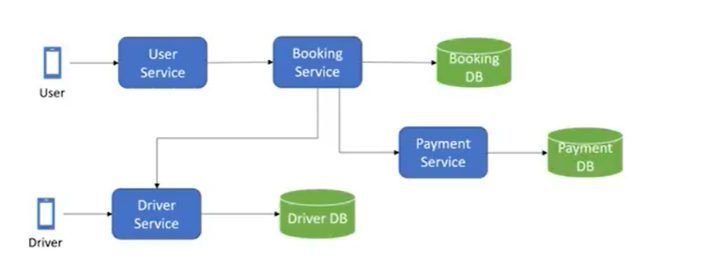
  

#### Approach for HLD Interviews
* lock down the requirements both functional and non-functional
  + include features and user journeys as well as performance requirements such as scale, latency, availability, consistency etc.
* propose an actual design
  + break down the system into multiple components
  + identify which microservices are needed
  + set up interactions between these microservices
  + finalize databases
* discuss tradeoffs for your further design decisions
  + what database should be suitable (SQL or non-SQL)
  + keep adjusting disign on your design decisions and tradeoffs until the requirements have been fulfilled
* once the design is finalized, state your sysem's limitations
  + e.g. monitoring component
  + other edge case that needs to be covered

### Introduction to Low Level System Design (LLD)

#### Difference between LLD and HLD
* LLD is an extension of HLD
* HLD is the overall architecture for the system while LLD will dig deeper into the indicidual sbsystems
* LLD would probably focus on one subsysem and the optimization of the subsystem
  + eg.we may only focus on the pricing system of Uber and optimization of the pricing subsystem
    + what is the most efficient way to get an estimated price for a ride before booking is made
    + what would be the best way to implement the subsystem such that the code is maintainable
  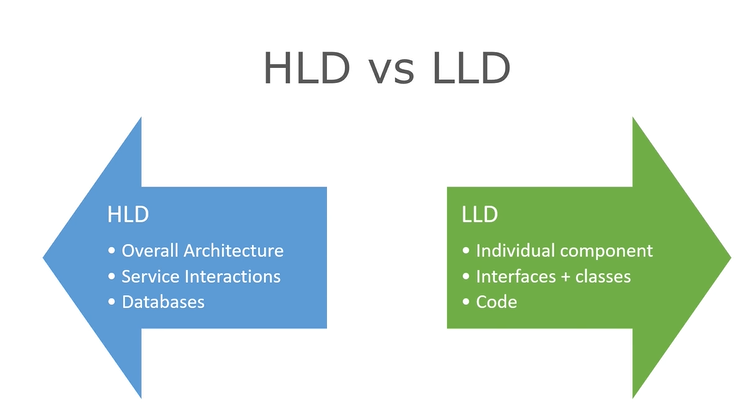
  
#### Interviewer's Expectations
* lock down the functional and non-functional requirements to limit your focus
* the design you propose should be able to meet all requirements
* the code you write should be clean, structured well, easily to understand, testbale, and working
* the design and code should be future-proof.
  + design and code should be non-restrictive
    + should not restrict to add new features
  + design and code should be modular
    + easy to add a new feature without affecting an old one
    
#### How to approach an LLD interview
* lock down both functional and non-functional requirements to limit the scope early on 
* start to coding. First to define the interface
  + if you build a web server, define APIs clearly
    + ensure your REST API follow REST standards
  + if you build a library
    + define APIs in a very clean manner as publicly accessible functions so the client can easily integrate them
* next, define class diagrams
  + define what classes are needed, how they interact, and class hierarchy
  + consider design patterns
* further define entities and data models  
* ensure code quality
  + have a working code with some basic test cases
  + how modular the code is. e.e. how easy it is to add new features without interfering with existing code
  + how testable the code is. The code should be broken down into functions to make it easy to test
* example of code quality considerations  
  + Take an example of a pricing service, where we are calculating Uber ride prices. 
  + If we are given a new requirement to also calculate the price for Uber eats, it should not be difficult to add that feature
  + Moreover, the code for both these features is independent of each other such that adding a new price calculator doesn’t affect the cab price calculator, hence minimizing the testing effort.
  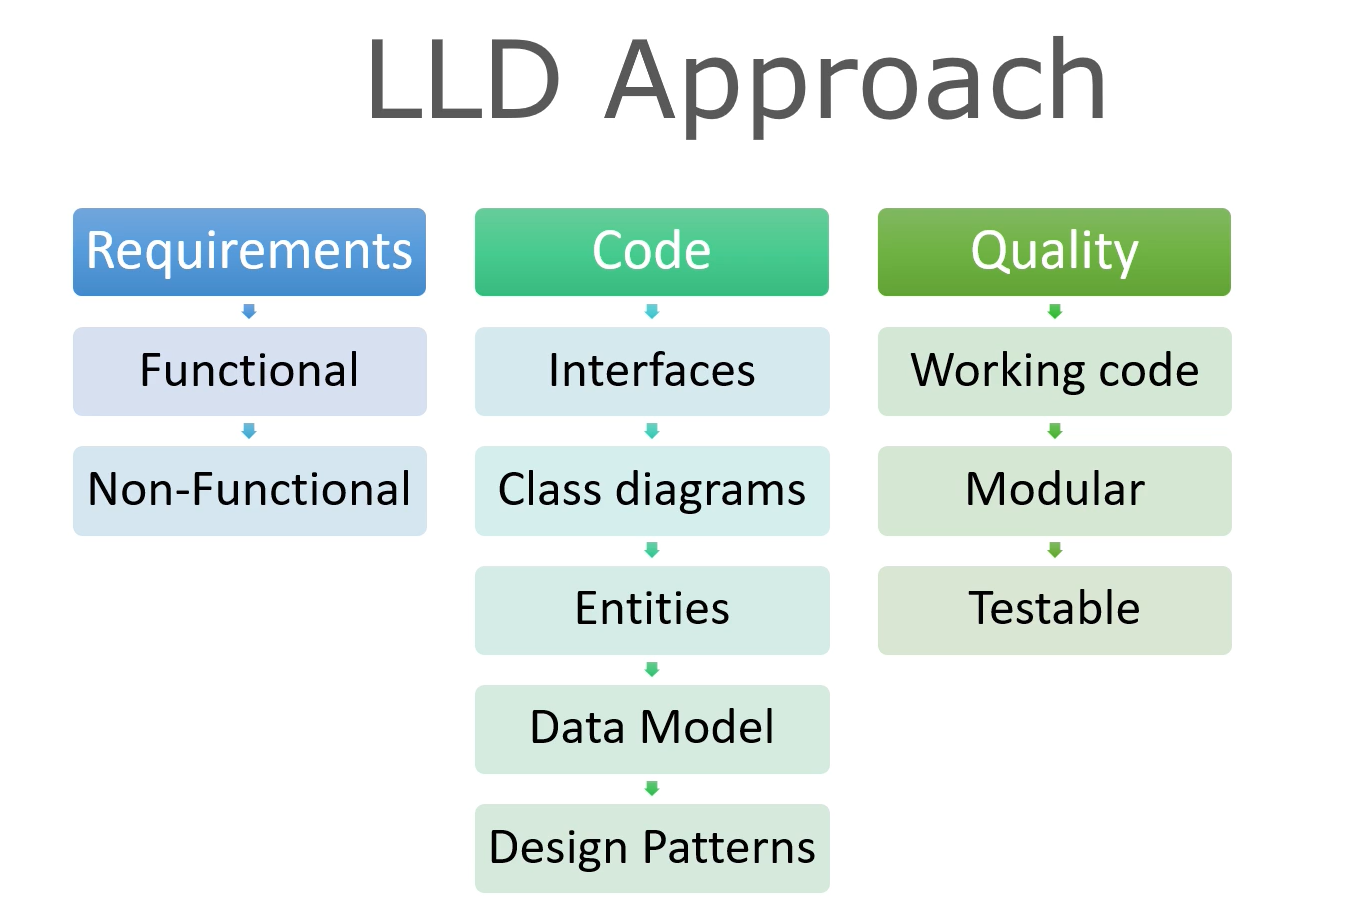
  
#### Example of desgin patterns in class diagram design
* use the example of Uber’s pricing engine
  + pricing engine has a function getFareEstimate() which fetches the basePrice and surgePrice and accordingly returns the total estimated fare.
  + getBasePrice() will return the base price based on distance, time, and ride type.
  + If there are too many requests from users for the current number of drivers, we will apply a surge price and increase the fare. Similarly, we will reduce the fare when there are too many drivers and comparatively fewer users
  + After calculating the base and surge price, getFareEstimate() will return the final fare
  + the class diagram of the design is shown below
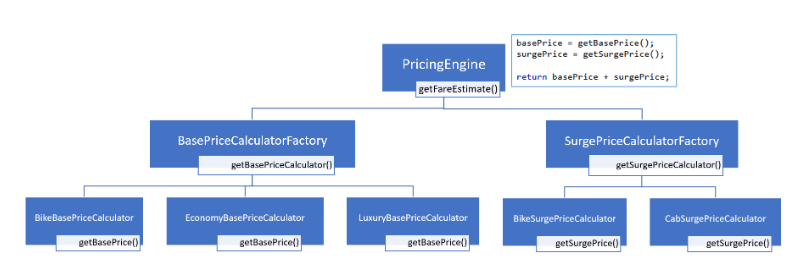
  + here, we use the Factory Design Pattern and add two factories
    + BasePriceCalculatorFactory for calculating basePrice
    + SurgePriceCalculatorFactory for calculating surgePrice
  + Base price and surge price will be calculated based on the ride type. 
    + BasePriceCalculatorFactory will fetch the class implementing the getBasePrice() for a given ride type
    + We can initialize BasePriceCalculator instances of the ride type by calling the getBasePriceCalculator() to calculate the base price.
    + similarly, SurgePriceCalculatorFactory can be used to instantiate SurgePriceCalculators 
  
  
